## 第一题 

### 重叠率公式的推广

我们由题目定义可知：在海低平面与水平面平行的情形下，重叠率$\eta$的定义为：
$$
\eta = 1 − d/W
$$

其中$d$为两条测线的距离，$w$为探测宽度。
我们将其变形可得到：

$$
\eta = \frac{2(W - d)}{2W}
$$

其中 $W - d$ 为重叠部分的长度，$2W$ 为两条测线测量范围的总长度。

即重叠部分长度为 $R$，两条测线测量范围的长度分别为 $W_1,W_2$，得到新的重叠率公式：

$$
\eta = \frac{2R}{W_1 + W_2}
$$


### 公式推导

In [1]:
from sympy import *

alpha = Symbol('alpha')
theta = Symbol('theta')

x = Symbol('x')
y = Symbol('y')
D = Symbol('D')

# y = tan(alpha) * x
line1 = tan(alpha) * x - y
# y = tan(-(pi/2-theta)) * x + D
line2 =  tan((pi/2-theta/2)) * x + D - y
line3 = tan(-(pi/2-theta/2)) * x + D - y

# 两直线交点
point1 = solve([line1, line2], [x, y])
point2 = solve([line1, line3], [x, y])

print(latex(point1))
print(latex(point2))
# 直线到原点距离
d1 = point1[x]/cos(alpha)
d2 = point2[x]/cos(alpha)
print(d1)
print(d2)
print(simplify(d1))
print(simplify(d2))
#print in latex
print(latex(simplify(d1)))
print(latex(simplify(d2)))

W = simplify( (point1[x] - point2[x])/cos(alpha))
print(W)
print(latex(W))

# 验证
alpha_value = 0.3
theta_value = 0.6*2

print(simplify(d1.subs({alpha:alpha_value, theta:theta_value, D:3})))
print(simplify(d2.subs({alpha:alpha_value, theta:theta_value, D:3})))


\left\{ x : - \frac{D}{- \tan{\left(\alpha \right)} + \cot{\left(\frac{\theta}{2} \right)}}, \  y : - \frac{D \tan{\left(\alpha \right)}}{- \tan{\left(\alpha \right)} + \cot{\left(\frac{\theta}{2} \right)}}\right\}
\left\{ x : \frac{D}{\tan{\left(\alpha \right)} + \cot{\left(\frac{\theta}{2} \right)}}, \  y : \frac{D \tan{\left(\alpha \right)}}{\tan{\left(\alpha \right)} + \cot{\left(\frac{\theta}{2} \right)}}\right\}
-D/((-tan(alpha) + cot(theta/2))*cos(alpha))
D/((tan(alpha) + cot(theta/2))*cos(alpha))
D/((tan(alpha) - cot(theta/2))*cos(alpha))
D/((tan(alpha) + cot(theta/2))*cos(alpha))
\frac{D}{\left(\tan{\left(\alpha \right)} - \cot{\left(\frac{\theta}{2} \right)}\right) \cos{\left(\alpha \right)}}
\frac{D}{\left(\tan{\left(\alpha \right)} + \cot{\left(\frac{\theta}{2} \right)}\right) \cos{\left(\alpha \right)}}
2*D*cot(theta/2)/((tan(alpha)**2 - cot(theta/2)**2)*cos(alpha))
\frac{2 D \cot{\left(\frac{\theta}{2} \right)}}{\left(\tan^{2}{\left(\alpha \right)} - \cot^{2}{\left(\frac{

以船只正下方与斜坡的焦点为原点，以水平线为$x$轴，垂直于水平线为$y$轴构造平面直角坐标系。

其中，构造斜坡的方程为：
$$
\begin{align*}
\tan(\alpha)x - y = 0    
\end{align*}
$$

船只探测范围的边界方程分别为：
$$
\begin{align*}
\tan(\pi/2-\theta/2)x + D -y = 0\\
\tan(\pi/2+\theta/2)x + D -y = 0
\end{align*}
$$

将联立方程式求解，分别得到：

$$
P_1 = \begin{bmatrix}
-\frac{D}{- \tan{\left(\alpha \right)} + \cot{\left(\frac{\theta}{2} \right)}} \\
-\frac{D \tan{\left(\alpha \right)}}{- \tan{\left(\alpha \right)} + \cot{\left(\frac{\theta}{2} \right)}}
\end{bmatrix}
$$

$$
P_2 = \begin{bmatrix}
\frac{D}{\tan{\left(\alpha \right)} + \cot{\left(\frac{\theta}{2} \right)}} \\
\frac{D \tan{\left(\alpha \right)}}{\tan{\left(\alpha \right)} + \cot{\left(\frac{\theta}{2} \right)}}
\end{bmatrix}
$$

两点与原点的连线在斜面上的投影长度，即为船只探测范围 $x-$ 与 $x+$ 边界点与原点距离为：

$$
\begin{align*}
u_1 =& \frac{P_{1x}}{\cos{\left(\alpha \right)}} =  \frac{D}{\left(\tan{\left(\alpha \right)} - \cot{\left(\frac{\theta}{2} \right)}\right) \cos{\left(\alpha \right)}}\\
u_2 =& \frac{P_{2x}}{\cos{\left(\alpha \right)}} = \frac{D}{\left(\tan{\left(\alpha \right)} + \cot{\left(\frac{\theta}{2} \right)}\right) \cos{\left(\alpha \right)}}
\end{align*}
$$

得到探测宽度为：

$$
W = u_2 - u_1 = \frac{2 D \cot{\left(\frac{\theta}{2} \right)}}{\left(\tan^{2}{\left(\alpha \right)} - \cot^{2}{\left(\frac{\theta}{2} \right)}\right) \cos{\left(\alpha \right)}}
$$

然而对于临近的另一条测线，这里作诠释 $d$ 为另一测线所在的 $x$ 坐标
。其深度为：

$$
D' = D - d\sin(\alpha)
$$

其在斜坡上与原点的距离为：

$$
\Delta u = \frac{d}{\cos(\alpha)}
$$

我们将原点距离公式中的 $D$ 替换为 $D'$，得到的坐标为 $u_1',再使用u_2'$
将探测宽度公式中的 $D$ 替换为 $D'$，得到的宽度为 $W'$

给出重叠长度的公式为：

$$
R =
\begin{cases}
u2 - u1' - \Delta u & \Delta u > 0\\
u2' - u1 + \Delta u & \Delta u < 0\\
\end{cases}
$$

最后根据重叠率公式即可计算得到重叠率：

$$
\eta = \frac{2R}{W + W'}
$$

In [ ]:
#几何法
import sympy as sp


D = Symbol('D')
alpha = Symbol('alpha')
theta = Symbol('theta')

l = tan(theta/2) * D
h = sin(alpha) * l
beta1 = pi/2 - alpha - theta/2
beta2 = pi/2 + alpha - theta/2
t1 = h/tan(beta1)
t2 = h/tan(beta2)

d1 = cos(alpha) * l + t1
d2 = cos(alpha) * l - t2

print(d1)
print(d2)

print(simplify(d1))
print(simplify(d2))

print(latex(simplify(d1)))
print(latex(simplify(d2)))

alpha_value = 0.3
theta_value = 0.6*2
print(simplify(d1.subs({alpha:alpha_value, theta:theta_value})))
print(simplify(d2.subs({alpha:alpha_value, theta:theta_value})))

print(simplify(d1.subs({alpha:alpha_value, theta:theta_value, D:3})))
print(simplify(d2.subs({alpha:alpha_value, theta:theta_value, D:3})))

几何法得到的公式不知道为什么不能自动化简到最简形式，最后用公式法得到的公式就可以了

## 求解

| x | depth | width | overlap_factor |
| --- | --- | --- | --- |
| -800 | 90.942 | 315.788 | 0.383 |
| -600 | 85.706 | 297.609 | 0.346 |
| -400 | 80.471 | 279.429 | 0.305 |
| -200 | 75.235 | 261.250 | 0.258 |
| 0 | 70.000 | 243.070 | 0.205 |
| 200 | 64.765 | 224.891 | 0.143 |
| 400 | 59.529 | 206.711 | 0.071 |
| 600 | 54.294 | 188.532 | -0.014 |
| 800 | 49.058 | 170.352 | -0.117 |


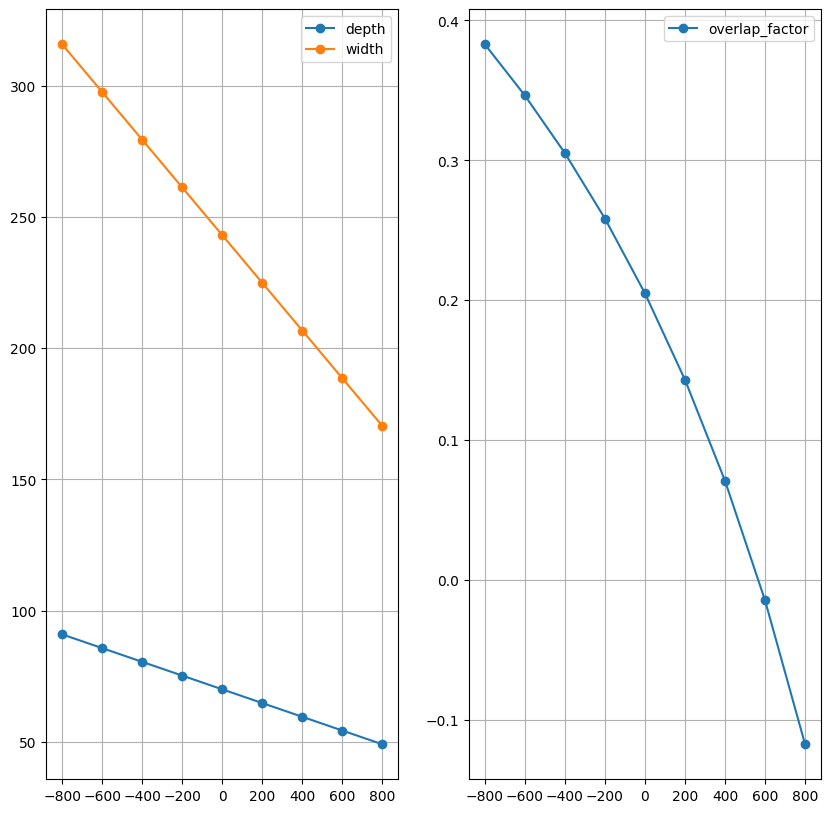

In [6]:
import matplotlib.pyplot as plt
from numpy import *

def offset_on_slope(depth, alpha, theta):
    u1 = depth/((tan(alpha) - 1/tan(theta/2))*cos(alpha))  # left
    u2 = depth/((tan(alpha) + 1/tan(theta/2))*cos(alpha))  # right
    return u1, u2


def depth_on_slope(alpha, x_0_depth, x):
    return x_0_depth - x*sin(alpha)


def width(depth, alpha, theta):
    u1,u2 = offset_on_slope(depth, alpha, theta)
    return u2 - u1


def overlap_factor(depth, alpha, theta, surface_distance):
    depth_prime = depth - surface_distance*sin(alpha)
    slope_distance = surface_distance/cos(alpha)
    u1, u2 = offset_on_slope(depth, alpha, theta)
    u3, u4 = offset_on_slope(depth_prime, alpha, theta)
    u3 += slope_distance
    u4 += slope_distance
    total_width = u2 - u1 + u4 - u3
    overlaps = u2 - u3 if surface_distance > 0 else u4 - u1
    return 2 * overlaps / total_width


x_set = [i for i in range(-800, 1000, 200)]
alpha = 1.5 * pi/180
theta = pi*2/3
x_0_depth = 70

depth_arr = []
width_arr = []
overlap_factor_arr = []
u1_arr = []
u2_arr = []

for x in x_set:
    depth_val = depth_on_slope(alpha, x_0_depth, x)
    width_val = width(depth_val, alpha, theta)
    overlap_factor_val = overlap_factor(depth_val, alpha, theta, -200)
    depth_arr.append(depth_val)
    width_arr.append(width_val)
    overlap_factor_arr.append(overlap_factor_val)


#print in markdown table format

print('| x | depth | width | overlap_factor |')
print('| --- | --- | --- | --- |')
for x, depth_val, width_val, overlap_factor_val in zip(x_set, depth_arr, width_arr, overlap_factor_arr):
    print('| {} | {:.3f} | {:.3f} | {:.3f} |'.format(x, depth_val, width_val, overlap_factor_val))
    

# plot the result

plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.plot(x_set, depth_arr, label='depth',marker='o')
plt.plot(x_set, width_arr, label='width',marker='o')
plt.xticks(x_set)
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(x_set, overlap_factor_arr, label='overlap_factor',marker='o')
plt.grid()
plt.xticks(x_set)
plt.legend()

| x | depth | width | overlap_factor |
| --- | --- | --- | --- |
| -800 | 90.942 | 315.788 | 0.383 |
| -600 | 85.706 | 297.609 | 0.346 |
| -400 | 80.471 | 279.429 | 0.305 |
| -200 | 75.235 | 261.250 | 0.258 |
| 0 | 70.000 | 243.070 | 0.205 |
| 200 | 64.765 | 224.891 | 0.143 |
| 400 | 59.529 | 206.711 | 0.071 |
| 600 | 54.294 | 188.532 | -0.014 |
| 800 | 49.058 | 170.352 | -0.117 |

## 第二题

令海底斜坡于水平面的交线为 $x$ 轴，竖直向上方向为 $z$ 正方向，建立直角坐标系，海底斜坡的斜坡的角度为 $\alpha$，则斜坡的法线为 ：

$$
\vec{n}=\begin{bmatrix}
0\\-\sin\alpha\\\cos\alpha
\end{bmatrix}
$$

斜坡在水平面上的投影即为 $\vec{n}$ ，其在 $xy$ 平面上的分量 为 $\vec{n}_0=\begin{bmatrix}0\\-\sin\alpha\\0\end{bmatrix}$，取其单位向量得到 $\vec{b} = \begin{bmatrix}0\\-1\\0 \end{bmatrix}$ $(\alpha>0)$

测线方向与海底坡面的法向在水平面上投影的夹角为 $\beta$，因测线的$z$分量为 0，则可得到测线的单位向量为 ：

$$
\vec{d}=\begin{bmatrix}\cos(\beta-\pi/2)\\\sin(\beta-\pi/2)\\0\end{bmatrix}
$$

测平面与斜坡的交线为 $l$ 线，记其方向为 $\vec{l}$ , 则有：

$$
\vec{l} = \vec{n} \times \vec{d} = 
\left[\begin{matrix}\cos{\left(\alpha \right)} \cos{\left(\beta \right)}\\\sin{\left(\beta \right)} \cos{\left(\alpha \right)}\\\sin{\left(\alpha \right)} \sin{\left(\beta \right)}\end{matrix}\right]
$$

其与xy平面的夹角记为 $\alpha'$ 记 $\vec{z}_e = \begin{bmatrix}0\\0\\1\end{bmatrix}$

$$
\alpha' = \pi/2 - \arccos (\vec{l}\cdot\vec{z}_e ) = \pi/2 - \arccos (\sin{\left(\alpha \right)} \sin{\left(\beta \right)} )
$$

$\alpha'$ 即为问题一中的 $\alpha$

将问题一中的宽度公式的 $\alpha$ 替换为 $\alpha'$ 即可得到问题二的宽度公式：

$$
W = \frac{2 D \cot{\left(\frac{\theta}{2} \right)}}{\left(\tan^{2}{\left(\alpha' \right)} - \cot^{2}{\left(\frac{\theta}{2} \right)}\right) \cos{\left(\alpha' \right)}}
$$

In [7]:
from numpy import *


def offset_on_slope(depth, alpha, theta):
    u1 = depth/((tan(alpha) - 1/tan(theta/2))*cos(alpha))  # left
    u2 = depth/((tan(alpha) + 1/tan(theta/2))*cos(alpha))  # right
    return u1, u2


def depth_on_slope(alpha, x_0_depth, x):
    return x_0_depth - x*sin(alpha)


def width(depth, alpha, theta):
    u1, u2 = offset_on_slope(depth, alpha, theta)
    return u2 - u1


width_data = []
other_data = []
alpha = 1.5 * pi/180
theta = pi*2/3
x_0_depth = 120
x_set = [i*0.3*1852 for i in range(8)]
beta_set = [i*pi/4 for i in range(8)]

for beta in beta_set:
    width_rol = []
    other_rol = []
    alpha_prime = pi/2 - arccos(sin(alpha)*sin(beta))
    for x in x_set:
        y = -cos(beta)*x
        depth_val = depth_on_slope(alpha, x_0_depth, y)
        width_val = width(depth_val, alpha_prime, theta)
        width_rol.append(width_val)
        other_rol.append(depth_val)
    width_data.append(width_rol)
    other_data.append(other_rol)

# print in latex table format
print('| beta |0|0.3|0.6|0.9|1.2|1.5|1.8|2.1|')
print('| --- | --- | --- | --- | --- | --- | --- | --- | --- |')
for beta, width_rol in zip(beta_set, width_data):
    print('| {:.0f} | {:.3f} | {:.3f} | {:.3f} | {:.3f} | {:.3f} | {:.3f} | {:.3f} | {:.3f} |'
          .format(beta*180/pi,
                  width_rol[0],
                  width_rol[1],
                  width_rol[2],
                  width_rol[3],
                  width_rol[4],
                  width_rol[5],
                  width_rol[6],
                  width_rol[7]))


| beta |0|0.3|0.6|0.9|1.2|1.5|1.8|2.1|
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | 415.692 | 466.074 | 516.455 | 566.837 | 617.219 | 667.600 | 717.982 | 768.363 |
| 45 | 416.191 | 451.859 | 487.527 | 523.195 | 558.863 | 594.531 | 630.199 | 665.867 |
| 90 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 |
| 135 | 416.191 | 380.523 | 344.855 | 309.188 | 273.520 | 237.852 | 202.184 | 166.516 |
| 180 | 415.692 | 365.311 | 314.929 | 264.547 | 214.166 | 163.784 | 113.403 | 63.021 |
| 225 | 416.191 | 380.523 | 344.855 | 309.188 | 273.520 | 237.852 | 202.184 | 166.516 |
| 270 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 |
| 315 | 416.191 | 451.859 | 487.527 | 523.195 | 558.863 | 594.531 | 630.199 | 665.867 |


| beta |0|0.3|0.6|0.9|1.2|1.5|1.8|2.1|
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | 415.692 | 466.074 | 516.455 | 566.837 | 617.219 | 667.600 | 717.982 | 768.363 |
| 45 | 416.191 | 451.859 | 487.527 | 523.195 | 558.863 | 594.531 | 630.199 | 665.867 |
| 90 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 |
| 135 | 416.191 | 380.523 | 344.855 | 309.188 | 273.520 | 237.852 | 202.184 | 166.516 |
| 180 | 415.692 | 365.311 | 314.929 | 264.547 | 214.166 | 163.784 | 113.403 | 63.021 |
| 225 | 416.191 | 380.523 | 344.855 | 309.188 | 273.520 | 237.852 | 202.184 | 166.516 |
| 270 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 | 416.692 |
| 315 | 416.191 | 451.859 | 487.527 | 523.195 | 558.863 | 594.531 | 630.199 | 665.867 |

## 第三题

直觉告诉我，最优的方法就是最简单的方法，只要沿着南北平行线进行测量即可，然后就只需要关心$\eta$了

In [ ]:
import sympy as sp

alpha = sp.Symbol('alpha')
theta = sp.Symbol('theta')

D = sp.Symbol('D')  # inital depth

x, y = sp.symbols('x y')

line = sp.tan(alpha) * x - D - y

# line from p1 to p2
line2 = -x/sp.tan(theta/2) + D - y

print(line2)
print(sp.simplify(line2))

# intersection
result = sp.solve([line, line2], (x, y))
# print simplfiy result in latex
print((sp.Matrix([[result[x]], [result[y]]])))
print(sp.latex(sp.Matrix([[result[x]], [result[y]]])))


l = result[x]/sp.cos(alpha)

print(f'l = {sp.latex(l)}')

print(f'l = {sp.latex(sp.simplify(l))}')

D_prime = sp.Symbol('D_prime')

l_prime = l.subs(D, D_prime)

d = (D-D_prime)/(sp.tan(alpha)*sp.cos(alpha))


eta = sp.Symbol('eta')

res = sp.solve(eta - 2*(l-d)/(l+l_prime), D_prime)

print(res)

res = sp.simplify(res[0])
print(res)

# #pirnt in latex
print(sp.latex(res))



我们首先给定直线方程 ：
$$y = \tan(\alpha)-D$$
设测量范围边界线的 $x$ 过点 $(0,-D)$ 则其在水面上的点为 $(tan(\theta/2),0)$, 其另一线过点 $(2\tan(\theta/2),-D)$
则可构建另一侧的直线方程为：

$$
-x - Dy\tan(\theta/2) + D^2\tan(\theta/2) 
$$

则两直线交点为：

$$
\left[\begin{matrix}\frac{2 D \tan{\left(\frac{\theta}{2} \right)}}{\tan{\left(\alpha \right)} \tan{\left(\frac{\theta}{2} \right)} + 1}\\\frac{D \tan{\left(\alpha \right)} \tan{\left(\frac{\theta}{2} \right)} - D}{\tan{\left(\alpha \right)} \tan{\left(\frac{\theta}{2} \right)} + 1}\end{matrix}\right]
$$

其在斜坡上的长度为：

$$
\begin{aligned}
l=& \frac{2 D \tan{\left(\frac{\theta}{2} \right)}}{\left(\tan{\left(\alpha \right)} \tan{\left(\frac{\theta}{2} \right)} + 1\right) \cos{\left(\alpha \right)}}
=&\frac{2 D \sin{\left(\frac{\theta}{2} \right)}}{\cos{\left(\alpha - \frac{\theta}{2} \right)}}
\end{aligned}
$$

于是，我们给出另一右侧临界点深度 $D'$ 其对应的斜坡扫描长度为 $l'$,
其与原深度 $D$ 对应的斜坡临界点 $(0,-D)$ 的距离为：
$$
d' = \frac{D-D'}{\tan{\alpha}\cos{\alpha}}
$$

此情况下的重叠率为：
$$
\eta = 2\frac{l-d'}{l+l'}
$$

解此方程，我们可以得到深度递推公式为：

$$
D' = \frac{D \left(- \eta \tan{\left(\alpha \right)} \tan{\left(\frac{\theta}{2} \right)} + 3 \tan{\left(\alpha \right)} \tan{\left(\frac{\theta}{2} \right)} + 1\right)}{\eta \tan{\left(\alpha \right)} \tan{\left(\frac{\theta}{2} \right)} + \tan{\left(\alpha \right)} \tan{\left(\frac{\theta}{2} \right)} + 1}
$$

该公式即为达到重叠率 $\eta$ 下一平行侧线处的深度。通过前面的公式，我们可得到下一平行侧线的右侧临界点为 $((D-D')cot(\alpha),-D')$，其平移量 $d = (D-D')cot(\alpha)$。基于上述提及条件，我们可给出南北向扫描的平行扫描间隔。再以海域的西南角为原点进行建模，西方向为 $x$ 轴正方向，北方向为 $y$ 轴正方向，取一海里为 $1852m$，则海域的西南角为 $(0, 0)$ ，东北角为 $(1852\times 4, 1852\times 2)$。参数为
$$
\begin{align*}
\alpha =& -1.5^\circ\\
\theta =& 120^\circ\\
D_0 =& 110 + 1852\times 2 \tan(\alpha)\\
\end{align*}
$$


|$\eta$| times | length(m) | length(nmi) |
|-|-|-|-|
|0.1000|34|125936|68.0|
|0.1100|35|129640|70.0|
|0.1200|35|129640|70.0|
|0.1300|35|129640|70.0|
|0.1400|36|133344|72.0|
|0.1500|36|133344|72.0|
|0.1600|37|137048|74.0|
|0.1700|37|137048|74.0|
|0.1800|37|137048|74.0|
|0.1900|38|140752|76.0|
|0.2000|38|140752|76.0|



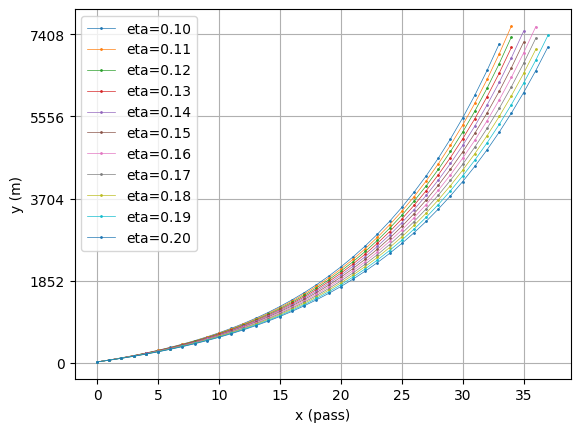


|$\eta$| times | length(m) | length(nmi) |
|-|-|-|-|
|0.1064|34|125936|68.0|
|0.1327|35|129640|70.0|
|0.1574|36|133344|72.0|
|0.1808|37|137048|74.0|



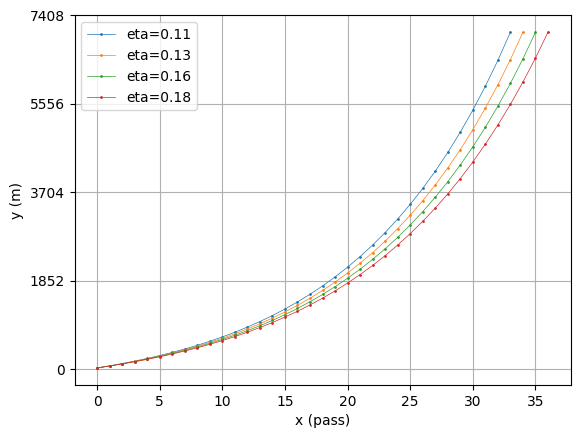

In [8]:
from numpy import *
import matplotlib.pyplot as plt


def next_depth(D, alpha, theta, eta):
    return D*(eta*tan(alpha)*tan(theta/2) - tan(alpha)*tan(theta/2) + 1)/(-eta*tan(alpha)*tan(theta/2) + tan(alpha)*tan(theta/2) + 1)

def end_x(x, D, alpha,theta):
    return x + 2*D*tan(theta/2)/(tan(alpha)*tan(theta/2) + 1)

def ship_x(x, D, theta):
    return x + D * tan(theta/2)

def x_offset(D, next_D, alpha):
    return (D-next_D)/tan(alpha)


alpha = -1.5*pi/180
theta = pi*2/3
eta_set = [0.1+i*0.01 for i in range(11)]

x_limit = 1852*4
y_len = 1852*2

def eta_set_plot(eta_set):
    result = []
    length = []
    for eta in eta_set:
        current_x = 0
        current_D = 110 + 1852*2*tan(alpha)
        x_list = []
        while True:
            x_list.append(ship_x(current_x, current_D, theta))
            if(end_x(current_x, current_D, alpha, theta) > x_limit):
                break
            next_D = next_depth(current_D, alpha, theta, eta)
            # x_list.append(next_D)
            current_x = current_x + x_offset(current_D, next_D, alpha)
            current_D = next_D
        result.append(x_list)
        length.append([len(x_list),len(x_list) * y_len])


    print()
    print('|$\eta$| times | length(m) | length(nmi) |')
    print('|-|-|-|-|')
    for eta, data in zip(eta_set, length):
        print(f'|{eta:.4f}|{data[0]}|{data[1]}|{data[1]/1852}|')
    print()

    for i in range(len(eta_set)):
        # add data points
        plt.plot(result[i], label=f'eta={eta_set[i]:.2f}', linewidth=0.5, marker='o', markersize=1)
    #grid with 1852 gap
    plt.yticks([i*1852 for i in range(5)])
    plt.xlabel('x (pass)')
    plt.ylabel('y (m)')
    plt.grid()
    plt.legend()
    plt.show()

eta_set_plot(eta_set)

result = []

def x_remain(eta):
    current_x = 0
    current_D = 110 + 1852*2*tan(alpha)
    step = 0
    while True:
        # x_list.append(ship_x(current_x, current_D, theta))
        end_pos = end_x(current_x, current_D, alpha, theta)
        step += 1
        if(end_pos > x_limit):
            return end_pos - x_limit
        next_D = next_depth(current_D, alpha, theta, eta)
        current_x = current_x + x_offset(current_D, next_D, alpha)
        current_D = next_D
    
from scipy.optimize import fmin

mins = []

def has_same_in_min(eta):
    for i in range(len(mins)):
        if abs(eta-mins[i]) < 1e-6:
            return True

for inital_eta in eta_set:
    # find the eta that x_remain(eta) == 0
    eta = inital_eta
    eta_res =  fmin(x_remain, eta,disp=False,xtol=1e-6,ftol=1e-6)
    if(has_same_in_min(eta_res[0]) or eta_res[0] > 0.2):
        continue
    mins.append(eta_res[0])

# print table in markdown format

eta_set_plot(mins)


## 第四题

第四题有点难度，我其实对优化什么的一窍不通，算漏测区域占比和 $\eta > 0.2$ 的占比也是相当麻烦，秉承着只要没有就不用计算的想法，只要与第三问一样将 $\eta$ 固定，限定航线的起止条件，就能达成漏测区域和 $\eta > 0.2$为 0 的目标。

这样一来就很好办了，因为 $\eta$ 固定，下一条相邻测线决定于上一条测线，只要给出初始测线，接下来只要迭代至结束即可。

### 准备工作

为了进行数值计算，需要些函数。

1. 海底平面函数：通过曲面拟合，得到的二元三次函数，$z = surface(x,y)$
2. 曲面两点长度函数：计算曲面上两点连线在曲面上的投影长度
3. 向量曲面求交函数：给定初始位置和方向，求解在此方向上直线和曲面的交点，因为解析式的计算量大，直接用二分法即可
4. 向量xy平面求交函数：给定初始位置和方向，求解在此方向上直线和xy平面的交点
5. 向量旋转函数：给定向量、转轴、转角，求解旋转后的向量
6. 左侧/右侧测量范围边界点函数：给定船的位置、航向、探测开角，求解左侧/右侧测量范围在海床上的边界点，这是向量曲面求交函数和向量旋转函数的组合
7. 反求测线位置函数：给定左侧/右侧测量范围边界点，船的航向、探测开角，求解测线的位置，这是向量xy平面求交函数和向量旋转函数的组合
8. 平面直线相交函数：给定平面上一点和平面的法线，求解平面于平行坐标轴的线的交点
9. $\eta$ 约束点函数：给定上一测线的左右探测范围边界点，探测开角，求解给定 $\eta$ 下船的位置、航向，这也是二分查找

### 初始测线

在规划第一条测线时，贴边走即可，并且不希望其进行冗余的测量，即测量范围超出海域。

初始位置：给定一个初始的航线，然后在四个角落中选择一个点比如 $(0,0,surface(0,0))$ 然后就可以用反求测线位置函数给出初始位置了。

#### 航向的求解

每次迭代船都会向着航向步进 $\Delta L$，求解的目的是让步进 $\Delta L$ 后的位置的探测范围边界落在海域边界线上，这样可以保证不冗余也不漏测。

给定当前测线位置 $P_{meas}$，与当前测线方向 $\vec{d}[0]$

步骤
1. 试步进 $P_{meas}[0] = P_{meas} + \vec{d}[0] \cdot \Delta L $
2. 求测量平面和海域边界线（平面直线相交函数），用交点的xy坐标计算对应的海床位置 $P_{surf}[0]$
3. 反求测线位置得到 $P_{meas}[1]$ （反求测线位置函数）
4. 修正航线 $\vec{d}[1] = \frac{P_{meas}[1] - P_{meas}[0]}{\|P_{meas}[1] - P_{meas}[0]\|}$
5. 重复步骤 1 直到 $\vec{d}[n]$ 收敛为止


### η 约束测线求解

在每条测线求解时，会将左右探测范围边界点存储在两个数组中，因为测量是往返进行的，需要准备四个数组，储存两个方向的边界点。

迭代的计算步骤为：
1. 以当前航线步进 $\Delta L$，求离步进后位置最近的上一测线左/右边界点，并得到与之对应的右/左边界点
2. $\eta$ 约束点函数

这里唯一繁琐一点的步骤是第一个步骤，看似我们需要在一个数组中找到最近的点，但是因为下一测线接着上一测线的末尾进行的，所以只要数组的末端即可，每越过一点就将其弹出，此外，需要对查找到的点进行插值求解，因为我们需要的是最近的临近边界线的位置，这里直接线性插值即可，方法是将末端点与当前的位置投影到末端两点的向量上，如果投影值为负就判断越过此点，弹出末端点，直到投影值为正，此时就可以进行线性插值了。另外为了防止数组越界，要提前对临近边界线进行外插值。

### 起止条件

测线的起止条件是：测线点的左右侧边界点均不在海域内。

开始时在内则反方向插值，在外则继续前进，至临界处插值计算起点；结束时至临界处插值计算终点。

终止条件1：至临近边界线的起点仍未进入海域
终止条件2：已经完全扫描了海域(没写)



In [10]:
from scipy import interpolate
import pickle
import xlsxwriter
import numpy as np
import matplotlib.pyplot as plt
import random
import taichi as ti
import taichi.math as tm

ti.init(arch=ti.cpu)

# from matplotlib import cm

mirror_x = False
mirror_y = False
swap_x_y = False
loop_limit = 100

inital_pos_set = ['left_down', 'left_up', 'right_down', 'right_up']
inital_dir_set = ['x', 'y']

# 00 x
# 01 x
# 10 x
# 11 x
# 20 x
# 21 y
# 30 x
# 31 y


inital_pos = inital_pos_set[2]
inital_dir = inital_dir_set[1]

first_delta_x = 100
delta_x_from = 100
delta_x_to = 100


if inital_pos == 'left_down' and inital_dir == 'x':
    inital_pos_name = '西南角'
    inital_dir_name = '东向'
    loop_limit = 90
    swap_x_y = True
elif inital_pos == 'left_up' and inital_dir == 'x':
    inital_pos_name = '西北角'
    inital_dir_name = '东向'
    loop_limit = 86
    mirror_y = True
    swap_x_y = True
elif inital_pos == 'right_down' and inital_dir == 'x':
    inital_pos_name = '东南角'
    inital_dir_name = '西向'
    mirror_x = True
    swap_x_y = True
    loop_limit = 60
elif inital_pos == 'right_up' and inital_dir == 'x':
    inital_pos_name = '东北角'
    inital_dir_name = '西向'
    mirror_x = True
    mirror_y = True
    swap_x_y = True
    loop_limit = 88
elif inital_pos == 'left_down' and inital_dir == 'y':
    inital_pos_name = '西南角'
    inital_dir_name = '北向'
elif inital_pos == 'left_up' and inital_dir == 'y':
    inital_pos_name = '西北角'
    inital_dir_name = '南向'
    mirror_y = True
elif inital_pos == 'right_down' and inital_dir == 'y':
    inital_pos_name = '东南角'
    inital_dir_name = '北向'
    mirror_x = True
elif inital_pos == 'right_up' and inital_dir == 'y':
    inital_pos_name = '东北角'
    inital_dir_name = '南向'
    mirror_x = True
    mirror_y = True

# mirror_x = True
# mirror_y = True
# swap_x_y = True

x_len = 4 * 1852
y_len = 5 * 1852

if swap_x_y:
    x_len, y_len = y_len, x_len


@ti.func
def surface(x0: ti.float64, y0: float):
    x = x0/1852.0
    y = y0/1852.0
    if swap_x_y:
        x, y = y, x
    if mirror_x:
        x = 4-x
    if mirror_y:
        y = 5-y
    p00 = 24.4
    p10 = -14.4
    p01 = -4
    p20 = 14.4
    p11 = 3.2
    p02 = 3.2
    p21 = -3.2
    return -(p00 + p10*x + p01*y + p20*x**2 + p11*x*y + p02*y**2 + p21*x**2*y)


def surface_(x0, y0):
    x = x0/1852.0
    y = y0/1852.0
    if swap_x_y:
        x, y = y, x
    if mirror_x:
        x = 4-x
    if mirror_y:
        y = 5-y
    p00 = 24.4
    p10 = -14.4
    p01 = -4
    p20 = 14.4
    p11 = 3.2
    p02 = 3.2
    p21 = -3.2
    return -(p00 + p10*x + p01*y + p20*x**2 + p11*x*y + p02*y**2 + p21*x**2*y)


plt_surf_x, plt_surf_y = np.meshgrid(
    np.arange(0, x_len, 100), np.arange(0, y_len, 100))
plt_surf_z = surface_(plt_surf_x, plt_surf_y)

# fig = plt.figure()

# C = plt.contourf(plt_surf_x, plt_surf_y, plt_surf_z, 10, alpha=0.75)
# # 图示
# plt.colorbar(C)

# plt.title(f'mirror_x={mirror_x} mirror_y={mirror_y} swap_x_y={swap_x_y}')


# plt.xlabel('x (m)')
# plt.ylabel('y (m)')
# plt.xticks([i*1852 for i in range(5)])
# plt.yticks([i*1852 for i in range(6)])
# plt.show()
@ti.func
def surface_intersection(X: tm.vec3, V: tm.vec3):
    # X: 3d point
    # V: 3d vector
    # return: 3d point
    t_a = 0.0  # min value
    t_b = 800.0  # max value
    X1 = tm.vec3(0.0, 0.0, 0.0)
    ti.loop_config(serialize=True)
    for _ in range(100):
        t = (t_a + t_b) / 2
        X1 = X + V * t
        error = X1[2] - surface(X1[0], X1[1])
        if abs(error) < 1e-3:
            break
        if error > 0:  # X1 is above surface
            t_a = t
        else:
            t_b = t
    return X1


@ti.func
def xy_plane_intersection(X: tm.vec3, V: tm.vec3) -> tm.vec3:
    # X: 3d point
    # V: 3d vector
    # return: 3d point
    t = -X[2] / V[2]
    X1 = X + V * t
    X1[2] = 0
    return X1


@ti.func
def surface_distance(X0: tm.vec3, X1: tm.vec3):
    # X0: 3d point
    # X1: 3d point
    # return: distance
    distance = 0.0
    p0 = tm.vec2(X0[0], X0[1])
    p1 = tm.vec2(X1[0], X1[1])
    last = tm.vec3(X0[0], X0[1], surface(X0[0], X0[1]))
    ti.loop_config(serialize=True)
    for i in range(0, 100):
        t = i / 100
        p = p0 + (p1-p0) * t
        X = tm.vec3(p[0], p[1], surface(p[0], p[1]))
        distance += tm.length(X-last)
        last = X
    return distance


@ti.func
def rotate_by_axis(V: tm.vec3, axis: tm.vec3, angle: float) -> tm.vec3:
    # V: 3d vector
    # axis: 3d vector
    # angle: radian
    # return: 3d vector
    V = V * tm.cos(angle) + (1-tm.cos(angle)) * tm.dot(V, axis) * \
        axis + tm.sin(angle) * tm.cross(axis, V)
    return V


@ti.func
def ship_pos_left(surface_pos, direction, theta) -> tm.vec3:
    # compute ship position use left surface pos
    # surface_pos: 3d point
    # direction: normalized 3d vector
    # return: 3d point

    # rotate [0,0,1] in axis of direction by theta/2
    V = rotate_by_axis(tm.vec3(0, 0, 1), direction, theta/2)
    return xy_plane_intersection(surface_pos, V)


@ti.func
def ship_pos_right(surface_pos, direction, theta) -> tm.vec3:
    # compute ship position use right surface pos
    # surface_pos: 3d point
    # direction: normalized 3d vector
    # return: 3d point

    # rotate [0,0,1] in axis of direction by theta/2
    V = rotate_by_axis(tm.vec3(0, 0, 1), direction, -theta/2)
    return xy_plane_intersection(surface_pos, V)


@ti.kernel
def ship_pos_right_(surface_pos: tm.vec3, direction: tm.vec3, theta: float) -> tm.vec3:
    return ship_pos_right(surface_pos, direction, theta)


@ti.kernel
def ship_pos_left_(surface_pos: tm.vec3, direction: tm.vec3, theta: float) -> tm.vec3:
    return ship_pos_left(surface_pos, direction, theta)


@ti.func
def ship_right_surface(ship_pos, direction, theta):
    # compute right surface pos use ship pos
    # ship_pos: 3d point
    # direction: normalized 3d vector
    # return: 3d point

    V = rotate_by_axis(tm.vec3(0, 0, -1), direction, -theta/2)
    return surface_intersection(ship_pos, V)


@ti.func
def ship_left_surface(ship_pos, direction, theta):
    # compute left surface pos use ship pos
    # ship_pos: 3d point
    # direction: normalized 3d vector
    # return: 3d point

    V = rotate_by_axis(tm.vec3(0, 0, -1), direction, theta/2)
    return surface_intersection(ship_pos, V)


@ti.kernel
def ship_right_surface_(ship_pos: tm.vec3, direction: tm.vec3, theta: float) -> tm.vec3:
    return ship_right_surface(ship_pos, direction, theta)


@ti.kernel
def ship_left_surface_(ship_pos: tm.vec3, direction: tm.vec3, theta: float) -> tm.vec3:
    return ship_left_surface(ship_pos, direction, theta)


def plane_axis_intersection(pos, normal, axis):
    # normal: 2d vector
    # axis: 'x' or 'y'
    # return: float
    if axis == 'x':
        return pos[0] + pos[1]*normal[1]/normal[0]
    elif axis == 'y':
        return pos[1] + pos[0]*normal[0]/normal[1]


@ti.kernel
def eta_controled_ship_pos_forward(
        near_surface_far: tm.vec3,
        near_surface_near: tm.vec3,
        direction: tm.vec3,
        theta: float,
        eta: float) -> tm.vec3:
    # surface_right: 3d point !is on left
    # surface_left: 3d point !is on right
    # direction: normalized 3d vector
    # return: 3d point
    near_surface_length = surface_distance(near_surface_far, near_surface_near)
    surface_left_pos_a = near_surface_far
    surface_left_pos_b = near_surface_near
    ship_pos = tm.vec3(0, 0, 0)
    ti.loop_config(serialize=True)
    for _ in range(100):
        surface_left_pos = (surface_left_pos_a + surface_left_pos_b) / 2
        ship_pos = ship_pos_left(surface_left_pos, direction, theta)
        surface_right_pos = ship_right_surface(ship_pos, direction, theta)
        surface_length = surface_distance(surface_right_pos, surface_left_pos)
        overlap = surface_distance(surface_left_pos, near_surface_near)
        eta_test = 2*overlap/(surface_length+near_surface_length)
        if (eta_test > eta):
            surface_left_pos_a = surface_left_pos
        else:
            surface_left_pos_b = surface_left_pos
        if (abs(eta_test-eta) < 1e-3):
            break
    return ship_pos


@ti.kernel
def eta_controled_ship_pos_inverse(near_surface_far: tm.vec3,
                                   near_surface_near: tm.vec3,
                                   direction: tm.vec3,
                                   theta: float,
                                   eta: float) -> tm.vec3:
    # surface_left: 3d point !is on right
    # surface_right: 3d point !is on left
    # direction: normalized 3d vector
    # return: 3d point
    near_surface_length = surface_distance(near_surface_far, near_surface_near)
    surface_right_pos_a = near_surface_far
    surface_right_pos_b = near_surface_near
    ship_pos = tm.vec3(0, 0, 0)
    ti.loop_config(serialize=True)
    for _ in range(100):
        surface_right_pos = (surface_right_pos_a + surface_right_pos_b) / 2
        ship_pos = ship_pos_right(surface_right_pos, direction, theta)
        surface_left_pos = ship_left_surface(ship_pos, direction, theta)
        surface_length = surface_distance(surface_left_pos, surface_right_pos)
        overlap = surface_distance(surface_right_pos, near_surface_near)
        eta_test = 2*overlap/(surface_length+near_surface_length)
        if (eta_test > eta):
            surface_right_pos_a = surface_right_pos
        else:
            surface_right_pos_b = surface_right_pos
        if (abs(eta_test-eta) < 1e-3):
            break
    return ship_pos

@ti.kernel
def catmull_rom_spline(p0:tm.vec2, p1:tm.vec2, p2:tm.vec2, p3:tm.vec2, t:float)->tm.vec2:
    return 0.5 * (
        (2 * p1) +
        (-p0 + p2) * t +
        (2 * p0 - 5 * p1 + 4 * p2 - p3) * t**2 +
        (-p0 + 3 * p1 - 3 * p2 + p3) * t**3
    )
@ti.kernel
def catmull_rom_spline_derivative(p0:tm.vec2, p1:tm.vec2, p2:tm.vec2, p3:tm.vec2, t:float)->tm.vec2:
    return 0.5 * (
        (-p0 + p2) +
        (4 * p0 - 10 * p1 + 8 * p2 - 2 * p3) * t +
        (-3 * p0 + 9 * p1 - 9 * p2 + 3 * p3) * t**2
    )

# v1 projection on v2


def vector_projection_factor(v1, v2):
    # v1: 3d vector
    # v2: 3d vector
    # return: 3d vector
    return np.dot(v1, v2) / np.dot(v2, v2)


def nearest_point_in_line(line: list, p_):
    # line: 3d point list
    # return: 2d point
    # scan from back to front
    # pop all section after min distance section
    # only consider 2d
    p = p_[0:2]
    min_point = line[-1]
    min_distance = 1e10
    prev_distance = 1e10
    pop_count = 0
    inc_count = 0
    for i in range(2, 10):
        # break for -i-1 out of range
        if len(line) < i+2:
            break
        p0 = line[-i+1][0:2]
        p1 = line[-i][0:2]
        p2 = line[-i-1][0:2]
        p3 = line[-i-2][0:2]
        v = p2 - p1
        # near point in p0 p1 section
        pf = vector_projection_factor(p-p1, v)
        if pf < 0:
            pf = 0
        if pf > 1:
            pf = 1

        p_near = catmull_rom_spline(p0, p1, p2, p3, pf)
        
        distance = np.linalg.norm(p_near-p)
        if distance < min_distance:
            min_distance = distance
            min_point = p_near
            pop_count = i-2
        elif distance > prev_distance:
            inc_count += 1
            if inc_count > 1:
                break
        prev_distance = distance
    else:
        print('nearest_point_in_line: iteration limit exceeded')

    for _ in range(pop_count):
        line.pop()

    return min_point





def vector_intersection(v1, v2, v3, v4):
    # o1: 2d point
    # d1: 2d vector
    # o2: 2d point
    # d2: 2d vector
    # return: 2d point
    x1 = v1[0]
    y1 = v1[1]
    x2 = v2[0]
    y2 = v2[1]
    x3 = v3[0]
    y3 = v3[1]
    x4 = v4[0]
    y4 = v4[1]
    x = ((x1*y2-y1*x2)*(x3-x4)-(x1-x2)*(x3*y4-y3*x4)) / \
        ((x1-x2)*(y3-y4)-(y1-y2)*(x3-x4))
    y = ((x1*y2-y1*x2)*(y3-y4)-(y1-y2)*(x3*y4-y3*x4)) / \
        ((x1-x2)*(y3-y4)-(y1-y2)*(x3-x4))
    return tm.vec2(x, y)


def vector_line_intersection(line: list, p_, vec_):
    # line: 3d point list
    # p:    3d point
    # vec:  2d vector

    # only consider 2d

    # scan from back to front
    # pop all section after intersection section

    p = p_[0:2]
    vec = vec_[0:2]

    for i in range(len(line)-1, 1, -1):
        # break for -i-1 out of range
        if len(line) < 4:
            fig = plt.figure()
            x = [i[0] for i in line]
            y = [i[1] for i in line]
            plt.plot(x, y)
            #draw the ray of p and vec
            plt.plot([p[0],p[0]+vec[0]*100],[p[1],p[1]+vec[1]*100])
            plt.show()
            raise Exception('vector_line_intersection: iteration limit exceeded')
            break
        p0 = line[i][0:2]
        p1 = line[i-1][0:2]
        p2 = line[i-2][0:2]
        p3 = line[i-3][0:2]
        side_0 = np.sign(np.cross(vec, p1-p))
        side_1 = np.sign(np.cross(vec, p2-p))
        if side_0 != side_1:
            # intersection
            point = vector_intersection(p1, p2, p, p+vec)
            t = vector_projection_factor(point-p1, p2-p1)
            point = catmull_rom_spline( p0, p1, p2, p3, t)
            line_vec = catmull_rom_spline_derivative( p0, p1, p2, p3, t)

            for _ in range(i+4,len(line)):
                line.pop()
            return point,line_vec
    else:
        fig = plt.figure()
        x = [i[0] for i in line]
        y = [i[1] for i in line]
        plt.plot(x, y)
        #draw the ray of p and vec
        plt.plot([p[0],p[0]+vec[0]*100],[p[1],p[1]+vec[1]*100])
        plt.show()
        raise Exception('vector_line_intersection: iteration limit exceeded')


all_trajectory = []
ship_forward_left_trajectory = []
ship_forward_right_trajectory = []
ship_inverse_left_trajectory = []
ship_inverse_right_trajectory = []

theta = np.pi*2/3

ship_pos = tm.vec3(0, 0, 0)
dir = tm.vec3(0, 1, 0)
eta = 0.15


x0 = 0
y0 = 0

surface_pos = tm.vec3(x0, y0, surface_(x0, y0))
ship_pos = ship_pos_left_(surface_pos, dir, theta)

first_trajectory = True
inversed = False
before_enter = True

plt.ion()
fig = plt.figure()


def point_out_range(point):
    return point[0] > x_len or point[1] > y_len or point[0] < 0 or point[1] < 0


def out_of_range():
    return point_out_range(ship_pos)\
        and point_out_range(ship_left_surface_(ship_pos, dir, theta))\
        and point_out_range(ship_right_surface_(ship_pos, dir, theta))


# passes loop
loop_terminate = False
for loop in range(loop_limit):
    if loop_terminate:
        all_trajectory.pop()
        break

    if inversed:
        left_trajectory = ship_inverse_left_trajectory
        right_trajectory = ship_inverse_right_trajectory
        prev_near_surface_trajectory = ship_forward_right_trajectory
        prev_far_surface_trajectory = ship_forward_left_trajectory
        eta_controled_func = eta_controled_ship_pos_inverse
        left_trajectory.clear()
        right_trajectory.clear()
    else:
        left_trajectory = ship_forward_left_trajectory
        right_trajectory = ship_forward_right_trajectory
        prev_near_surface_trajectory = ship_inverse_left_trajectory
        prev_far_surface_trajectory = ship_inverse_right_trajectory
        eta_controled_func = eta_controled_ship_pos_forward
        left_trajectory.clear()
        right_trajectory.clear()

    if not first_trajectory:
        dir = -dir

        ship_pos = eta_controled_func(
            prev_far_surface_trajectory[-1],
            prev_near_surface_trajectory[-1],
            dir,
            theta,
            eta)

        # extand data
        # end extand
        for _ in range(10):
            extand_vec = (
                prev_near_surface_trajectory[0] - prev_near_surface_trajectory[1])
            extand_vec = extand_vec / \
                np.linalg.norm(extand_vec) * 200  # normalize
            prev_near_surface_trajectory.insert(
                0, prev_near_surface_trajectory[0] + extand_vec)
            extand_vec = (
                prev_far_surface_trajectory[0] - prev_far_surface_trajectory[1])
            extand_vec = extand_vec / \
                np.linalg.norm(extand_vec) * 200  # normalize
            prev_far_surface_trajectory.insert(
                0, prev_far_surface_trajectory[0] + extand_vec)
        # begin extand
        extand_vec = (
            prev_near_surface_trajectory[-1] - prev_near_surface_trajectory[-2])
        extand_vec = extand_vec / \
            np.linalg.norm(extand_vec) * 100  # normalize
        prev_near_surface_trajectory.append(
            prev_near_surface_trajectory[-1] + extand_vec)
        extand_vec = (
            prev_far_surface_trajectory[-1] - prev_far_surface_trajectory[-2])
        extand_vec = extand_vec / \
            np.linalg.norm(extand_vec) * 100  # normalize
        prev_far_surface_trajectory.append(
            prev_far_surface_trajectory[-1] + extand_vec)

        # ship pos adjustment
        # last_pos_out_range = out_of_range()
        # last_pos = ship_pos
        # for _ in range(100):
        #     if last_pos_out_range:
        #         last_pos = ship_pos
        #         ship_pos = ship_pos + dir * delta_x
        #     else:
        #         last_pos = ship_pos
        #         ship_pos = ship_pos - dir * delta_x
        #     if out_of_range() != last_pos_out_range:
        #         break
        # else:
        #     print('ship pos adjustment 1: iteration limit exceeded')

        # p0 = ship_pos
        # v0 = ship_pos - last_pos
        # t_a = 0.0
        # t_b = 1.0
        # for _ in range(100):
        #     t = (t_a + t_b) / 2
        #     ship_pos = p0 + t*v0
        #     if not out_of_range():
        #         t_a = t
        #     else:
        #         t_b = t
        #     if abs(t_a-t_b) < 1e-3:
        #         break
        # else:
        #     print('ship pos adjustment 2: iteration limit exceeded')

    all_trajectory.append([])
    trajectory = all_trajectory[-1]
    dir_change = 1
    prev_t = 0
    # pre pass loop
    while True:

        left_trajectory.append(ship_left_surface_(ship_pos, dir, theta))
        right_trajectory.append(ship_right_surface_(ship_pos, dir, theta))
        # if not out_of_range():
        trajectory.append(ship_pos)

        if (first_trajectory):
            # dir computation loop
            for _ in range(100):
                test_ship_pos = ship_pos + dir * first_delta_x

                next_surface_pos_y = plane_axis_intersection(
                    test_ship_pos, dir, 'y')
                next_surface_pos_x = 0
                next_surface_pos = tm.vec3(next_surface_pos_x,
                                           next_surface_pos_y,
                                           surface_(next_surface_pos_x, next_surface_pos_y))

                next_ship_pos = ship_pos_left_(next_surface_pos, dir, theta)
                next_dir = next_ship_pos - ship_pos
                next_dir = next_dir / np.linalg.norm(next_dir)  # normalize
                if np.linalg.norm(next_dir-dir) < 1e-3:
                    dir = next_dir
                    ship_pos = next_ship_pos
                    break
                dir = next_dir
            else:
                print('over limit')
        else:

            depth = -surface_(ship_pos[0], ship_pos[1])
            delta_x = random.uniform(delta_x_from, delta_x_to)
            
            p0 = prev_near_surface_trajectory[-1][0:2]
            p1 = prev_near_surface_trajectory[-2][0:2]
            p2 = prev_near_surface_trajectory[-3][0:2]
            p3 = prev_near_surface_trajectory[-4][0:2]

            ori_p0 = catmull_rom_spline(p0, p1, p2, p3, prev_t)
                

            t_a = prev_t
            t_b = 2
            for _ in range(10):
                t = (t_a + t_b) / 2
                if(t>1):
                    prev_near_surface_trajectory.pop()
                    prev_far_surface_trajectory.pop()
                    if(len(prev_near_surface_trajectory) < 4):
                        break
                    p0 = prev_near_surface_trajectory[-1][0:2]
                    p1 = prev_near_surface_trajectory[-2][0:2]
                    p2 = prev_near_surface_trajectory[-3][0:2]
                    p3 = prev_near_surface_trajectory[-4][0:2]
                    t_a = 0
                    continue
                p = catmull_rom_spline(p0, p1, p2, p3, t)
                d = np.linalg.norm(p - ori_p0)
                if d < delta_x:
                    t_a = t
                else:
                    t_b = t
                if abs(t_a-t_b) < 0.1:
                    break
            if(len(prev_near_surface_trajectory) < 4):
                print('len(prev_near_surface_trajectory) < 4')
                loop_terminate = True
                break


            prev_t = t

            p0_far = prev_far_surface_trajectory[-1][0:2]
            p1_far = prev_far_surface_trajectory[-2][0:2]
            p2_far = prev_far_surface_trajectory[-3][0:2]
            p3_far = prev_far_surface_trajectory[-4][0:2]

            p_far = catmull_rom_spline(p0_far, p1_far, p2_far, p3_far, t)
            


            near_surface_near = tm.vec3(p[0], p[1], surface_(p[0], p[1]))
            near_surface_far = tm.vec3(p_far[0], p_far[1], surface_(p_far[0], p_far[1]))

            dir = catmull_rom_spline_derivative(p0, p1, p2, p3, t)
            dir = dir / np.linalg.norm(dir)  # normalize
            dir = tm.vec3(dir[0], dir[1], 0)
            # if inversed:
            #     dir = -dir


            ship_pos = eta_controled_func(
                near_surface_far,
                near_surface_near,
                dir,
                theta,
                eta)

            # print('pos', ship_pos, 'dir', dir,'err',error)


        if loop_terminate:
            break

        is_out_of_range = out_of_range()
        if not before_enter and is_out_of_range:


            first_trajectory = False
            inversed = not inversed
            before_enter = True

            p0 = trajectory[-1]
            v0 = ship_pos - p0

            t_a = 0.0
            t_b = 1.0
            for _ in range(100):
                t = (t_a + t_b) / 2
                ship_pos = p0 + t*v0
                if not out_of_range():
                    t_a = t
                else:
                    t_b = t
                if abs(t_a-t_b) < 1e-3:
                    break
            else:
                print('out of range: iteration limit exceeded')

            trajectory.append(ship_pos)
            left_trajectory.append(ship_left_surface_(ship_pos, dir, theta))
            right_trajectory.append(ship_right_surface_(ship_pos, dir, theta))

            
            print('loop', loop, end=' ')
            break
        elif not is_out_of_range:
            before_enter = False

    if (loop % 10 == 0 or loop_terminate):

        fig.clear()
        ax = fig.add_subplot(121,projection='3d')

        x = [i[0] for i in trajectory]
        y = [i[1] for i in trajectory]
        z = [i[2] for i in trajectory]
        ax.plot(x, y, z, label='trajectory',)

        x = [i[0] for i in left_trajectory]
        y = [i[1] for i in left_trajectory]
        z = [i[2] for i in left_trajectory]
        ax.plot(x, y, z, label='ship_left_trajectory')

        x = [i[0] for i in right_trajectory]
        y = [i[1] for i in right_trajectory]
        z = [i[2] for i in right_trajectory]
        ax.plot(x, y, z, label='ship_right_trajectory')

        # surf = ax.plot_surface(plt_surf_x, plt_surf_y, plt_surf_z, cmap=cm.coolwarm,linewidth=0)
        plt.subplot(122)


        x = [i[0] for i in trajectory]
        y = [i[1] for i in trajectory]
        plt.plot(x, y, label='trajectory', color='navy')

        x = [i[0] for i in left_trajectory]
        y = [i[1] for i in left_trajectory]
        plt.plot(x, y, label='ship_left_trajectory', color='red')

        x = [i[0] for i in right_trajectory]
        y = [i[1] for i in right_trajectory]
        plt.plot(x, y, label='ship_right_trajectory', color='orange')

        x = [i[0] for i in prev_far_surface_trajectory]
        y = [i[1] for i in prev_far_surface_trajectory]
        plt.plot(x, y, label='prev_far', color = 'w')

        x = [i[0] for i in prev_near_surface_trajectory]
        y = [i[1] for i in prev_near_surface_trajectory]
        plt.plot(x, y, label='prev_near', color = 'g')


        plt.legend()

        C = plt.contourf(plt_surf_x, plt_surf_y, plt_surf_z, 10, alpha=0.75)
        # 图示
        plt.colorbar(C)

        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.xticks([i for i in range(0, x_len+1852, 1852)])
        plt.yticks([i for i in range(0, y_len+1852, 1852)])

        ax.legend()
        plt.xticks([i for i in range(0, x_len+1852, 1852)])
        plt.yticks([i for i in range(0, y_len+1852, 1852)])
        plt.show()
        plt.pause(0.1)

if loop == loop_limit-1:
    print('loop limit exceeded')

for trajectory in all_trajectory:
    if mirror_x:
        for point in trajectory:
            point[0] = x_len-point[0]
    if mirror_y:
        for point in trajectory:
            point[1] = y_len-point[1]
    if swap_x_y:
        for point in trajectory:
            point[0], point[1] = point[1], point[0]

trajectory_length = 0
trajectory_length_with_transition = 0

prev_point_g = all_trajectory[0][0]
for trajectory in all_trajectory:
    prev_point = trajectory[0]
    for point in trajectory:
        trajectory_length += np.linalg.norm(point-prev_point)
        trajectory_length_with_transition += np.linalg.norm(point-prev_point_g)
        prev_point = point
        prev_point_g = point
# print in markdown format

print('|初始位置|初始方向|轨迹长度(m)|轨迹长度(包含转移)(m)|轨迹长度(nmi)|轨迹长度(包含转移)(nmi)|')
print('|---|---|')
print('|', inital_pos_name, '|', inital_dir_name, '|', trajectory_length, '|', trajectory_length_with_transition,
      '|', trajectory_length/1852, '|', trajectory_length_with_transition/1852, '|')


def data_transfer(V0):
    V = tm.vec3(V0)
    if mirror_x:
        V[0] = x_len-V[0]
    if mirror_y:
        V[1] = y_len-V[1]
    if swap_x_y:
        V[0], V[1] = V[1], V[0]
    return V


# write to excel
workbook = xlsxwriter.Workbook(
    f'轨迹数据({inital_pos_name} {inital_dir_name}).xlsx')
worksheet = workbook.add_worksheet()
worksheet.write(0, 0, f'轨迹编号({inital_pos_name} {inital_dir_name})')
for i in range(len(all_trajectory)):
    worksheet.write(i*2+1, 0, i)
    worksheet.write(i*2+2, 0, i)
    for j in range(len(all_trajectory[i])):
        p = data_transfer(all_trajectory[i][j])
        worksheet.write(i*2+1, j+2, p[0])
        worksheet.write(i*2+2, j+2, p[1])

# save excel
workbook.close()

fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
last_end_pos = all_trajectory[0][0]
for trajectory in all_trajectory:
    x = [i[0] for i in trajectory]
    y = [i[1] for i in trajectory]
    z = [i[2] for i in trajectory]

    # last_end_pos to first point of trajectory
    hd1 = plt.plot([last_end_pos[0], x[0]], [last_end_pos[1], y[0]],
                   label='transition trajectory', color='red')
    hd2 = plt.plot(x, y, label='trajectory', color='navy')
    last_end_pos = trajectory[-1]

mirror_x = False
mirror_y = False
swap_x_y = False

plt_surf_x, plt_surf_y = np.meshgrid(
    np.arange(0, x_len, 100), np.arange(0, y_len, 100))
plt_surf_z = surface_(plt_surf_x, plt_surf_y)

C = plt.contourf(plt_surf_x, plt_surf_y, plt_surf_z, 10, alpha=0.75)
# 图示
plt.colorbar(C)

plt.title('Trajectory')


plt.xlabel('x (m)')
plt.ylabel('y (m)')
fig.legend(handles=[hd1[0], hd2[0]])
plt.xticks([i for i in range(0, x_len+1852, 1852)])
plt.yticks([i for i in range(0, y_len+1852, 1852)])
plt.show()

input("Press [enter] to continue.")


def data_transfer_1(V):
    if swap_x_y:
        V[0], V[1] = V[1], V[0]
    if mirror_x:
        V[0] = x_len-V[0]
    if mirror_y:
        V[1] = y_len-V[1]


for trajectory in all_trajectory:
    trajectory = [data_transfer_1(i) for i in trajectory]

# serialize
with open(f'trajectory({inital_pos_name} {inital_dir_name}).pickle', 'wb') as f:
    pickle.dump(all_trajectory, f)


array([0, 1, 0])